In [1]:
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
f = open('to_filter.txt','r')

In [3]:
c = f.readlines()
data = [int(i[:-1]) for i in c]
print(data)

[3, 240, 31, 262, 438, 335, 242, 395, 374, 249, 441, 313, 235, 418, 351, 244, 360, 388, 255, 434, 330, 240, 3, 262, 438, 335, 242, 395, 374, 249, 441, 313, 235, 418, 351, 244, 360, 388, 255, 434, 330, 240, 3, 398, 431, 414, 383, 349, 300, 268, 247, 232, 221, 345, 418, 430, 363, 238, 433, 299, 220, 411, 340, 231, 351, 377, 240, 427, 317, 225, 388, 361, 235, 434, 299, 222, 414, 338, 231, 358, 382, 249, 436, 324, 234, 398, 367, 243, 435, 299, 221, 415, 336, 231, 359, 377, 241, 447, 370, 332, 504, 411, 189, 355, 244, 195, 409, 340, 242, 376, 390, 258, 447, 332, 248, 419, 380, 263, 459, 325, 254, 449, 368, 271, 406, 419, 291, 482, 370, 291, 464, 423, 313, 513, 380, 314, 506, 420, 322, 455, 455, 319, 497, 373, 281, 449, 393, 270, 461, 319, 243, 443, 349, 246, 389, 389, 254, 449, 328, 241, 422, 368, 251, 453, 311, 238, 442, 347, 247, 393, 390, 256, 454, 326, 240, 421, 364, 247, 449, 309, 235, 439, 339, 239, 391, 383, 249, 446, 318, 234, 419, 359, 244, 447, 300, 229, 436, 337, 238, 392, 379, 2

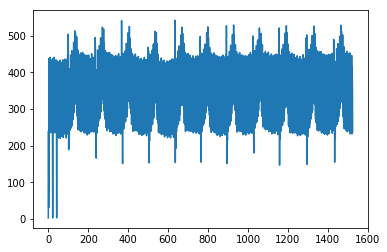

In [4]:
f = plt.figure(1)
plt.plot(data)

In [202]:
# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db.
         # For Chebyshev and elliptic filters, provides the maximum ripple in the passband. (dB)
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter
    from scipy.signal import lfilter
    fs   = 3000.0
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype='butter')
    filtered_data = lfilter(b, a, data)
    return filtered_data

In [203]:
filt = Implement_Notch_Filter(0.002,10,51, 3, 2,'butter', data)
print(filt)

[  2.95589852 236.38483076  23.49593251 ... 398.17781834 337.64205371
 221.90829376]


In [204]:
f = plt.figure(1)
plt.plot(filt)